In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [42]:
delivery_preference_df = pd.read_csv("Dataset/delivery_preference.csv")
recipe_preference_df = pd.read_csv("Dataset/Recipe Preference.csv")
user_interaction_data_df = pd.read_csv("Dataset/User Interaction Data.csv")

In [43]:
delivery_preference_df

,User ID,Delivery Address,Delivery Frequency,Preferred Delivery Day,Latitude,Longitude
0,1,"2940 Holt Burgs, Sarnia, ON",3,"Sunday, Thursday, Saturday",42.9745,-82.4066
1,2,"6160 Ian Alley, Clarence-Rockland, ON",5,"Monday, Thursday, Tuesday, Sunday, Wednesday",45.5887,-75.5127
2,3,"28788 Black Grove, Chatham, ON",4,"Friday, Monday, Tuesday, Thursday",42.4254,-82.1892
3,4,"673 Barnes Wall, Greater Sudbury, ON",6,"Friday, Wednesday, Sunday, Monday, Tuesday, Sa...",46.4900,-80.9900
4,5,"2389 Wallace Neck, London, ON",5,"Thursday, Tuesday, Saturday, Sunday, Monday",42.9849,-81.2453
...,...,...,...,...,...,...
15244,15245,"2203 Charles Canyon, Brantford, ON",6,"Tuesday, Monday, Sunday, Saturday, Wednesday, ...",43.1394,-80.2644
15245,15246,"71753 Weber Court, Peterborough, ON",5,"Friday, Saturday, Wednesday, Thursday, Tuesday",44.3091,-78.3197
15246,15247,"9027 Alexander Throughway, Barrie, ON",4,"Friday, Saturday, Tuesday, Monday",44.3894,-79.6903
15247,15248,"0784 Bennett Unions, Kenora, ON",3,"Thursday, Wednesday, Monday",49.7661,-94.4894


In [44]:
recipe_preference_df

,User ID,Preferred Category,Most Requested Recipes
0,1,Other,"Carolina Wings, Tofu and Artichoke Risotto"
1,2,Other,Blue Cheese Dressing
2,3,Meats,Savory Saffron Chicken Polow
3,4,Desserts,"Brazilian Crab Cakes (Casquinha de Siri), Jamb..."
4,5,Other,"Crime Scene, Ragu Alla Bolognese"
...,...,...,...
15244,15245,Desserts,Nadia's Morning Coffee Cake with Winter Fruits
15245,15246,Soups,"Smokin' Chipotle Pork Stew, Kazakh Beef Soup"
15246,15247,Other,Salsa Borracha (Drunk Salsa)
15247,15248,Meats,"Low Fat Cheesy Spinach and Eggplant Lasagna, G..."


In [45]:
user_interaction_data_df

,User ID,Sessions Initiated,Average Time per Session (min),Favorite Recipes,Last Purchase
0,1,5,27.35,"Placek, Flo's Clams Casino",2023-06-30
1,2,28,8.27,Fried Sweet Potato Hashbrowns,2023-07-20
2,3,14,23.49,"Scalloped Potatoes with Ham, World Famous Rend...",2023-01-14
3,4,8,10.39,Rustic Apple Pie with Dried Cherries,2023-05-19
4,5,39,21.96,"Herb-Marinated Squid, Mashed Potatoes with Ran...",2023-05-11
...,...,...,...,...,...
15244,15245,8,8.90,Chocolate Banana Crepes,2023-04-24
15245,15246,23,19.96,Chilled Cucumber Soup with Smoked Salmon and Dill,2023-12-30
15246,15247,38,20.19,"Cod Bordelaise, White and Sweet Whipped Potatoes",2023-05-26
15247,15248,47,23.27,"Gotham Sundae, Grilled Lemon-Coriander Chicken",2023-11-09


## EDA

### EDA for Delivery Preference Dataset

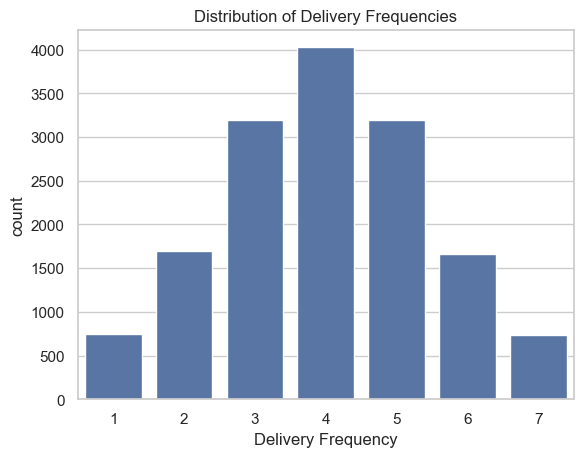

In [46]:
sns.countplot(x='Delivery Frequency', data= delivery_preference_df)
plt.title('Distribution of Delivery Frequencies')
plt.show()

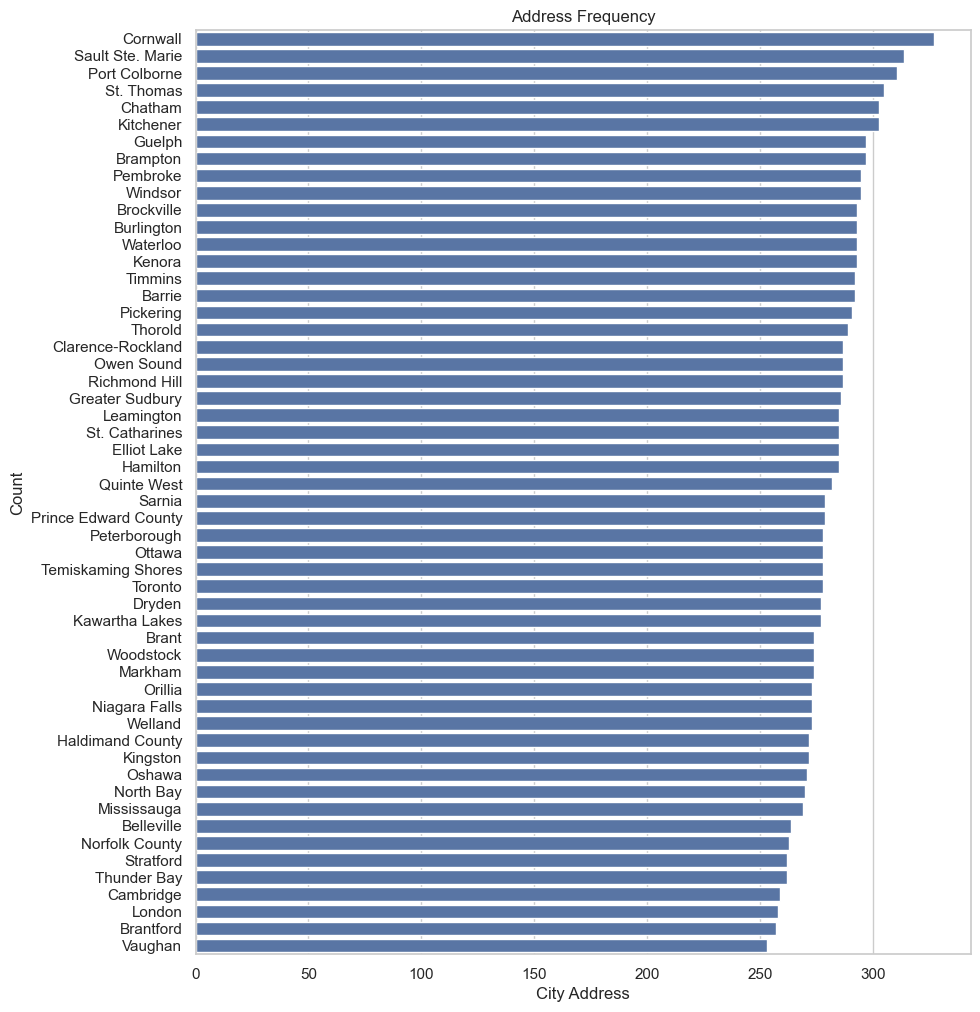

In [60]:
data_city = delivery_preference_df["Delivery Address"].apply(lambda x: x.split(", ")[1])

fig, ax = plt.subplots(figsize=(10, 12))
sns.barplot(x= data_city.value_counts().values, y= data_city.value_counts().index)
plt.xlabel('City Address')
plt.ylabel('Count')
plt.title("Address Frequency")
plt.show()

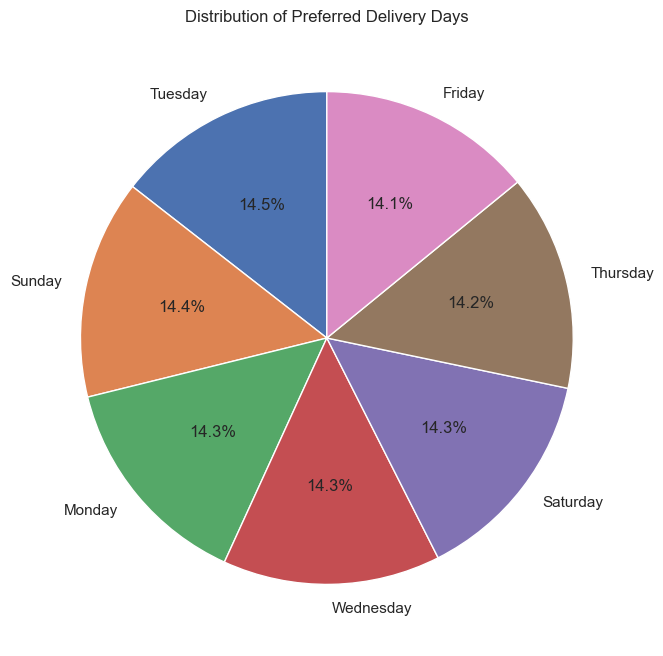

In [66]:
# delivery_preference_df['Preferred Delivery Day']

day_counts = delivery_preference_df['Preferred Delivery Day'].str.split(', ').explode().value_counts()

# Plot the data in a pie chart
plt.figure(figsize=(10, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Preferred Delivery Days')
plt.show()

### EDA for Recipe Dataset

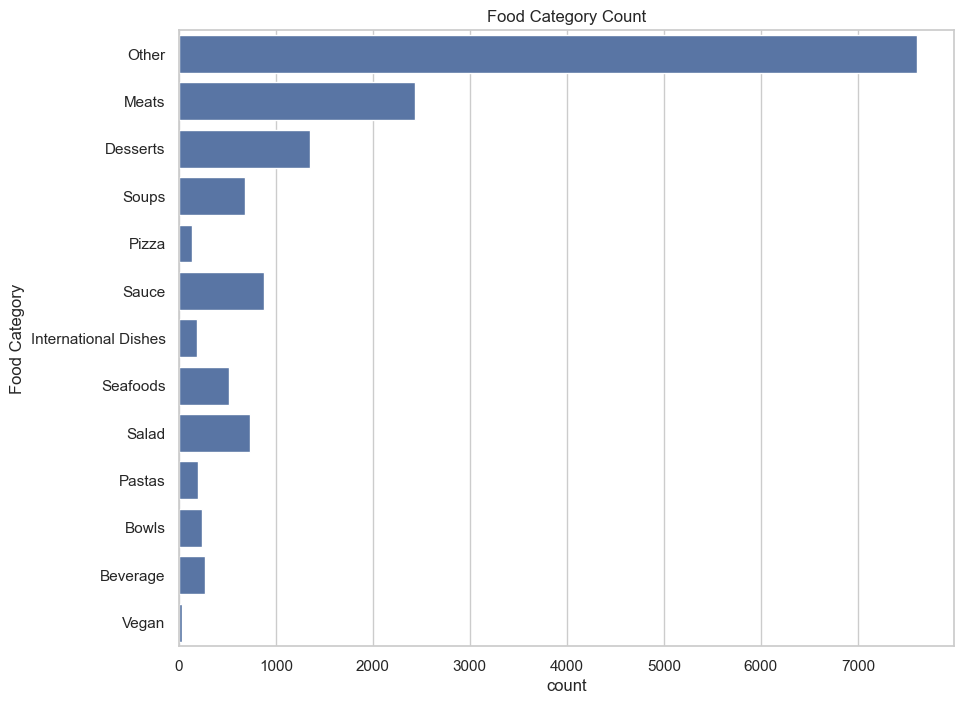

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data= recipe_preference_df['Preferred Category'])
plt.ylabel("Food Category")
plt.title("Food Category Count")
plt.show()

### EDA for User Interaction Dataset

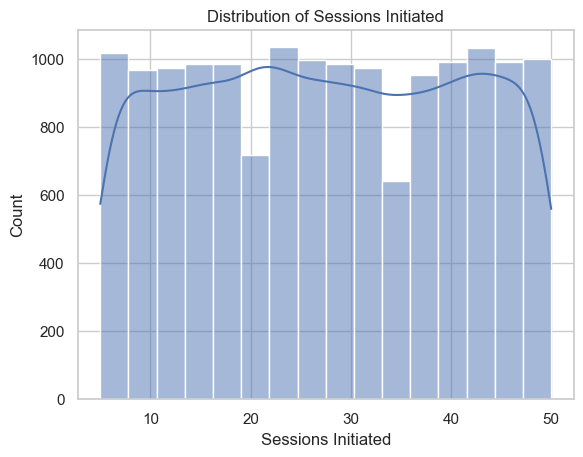

In [89]:
sns.histplot(user_interaction_data_df['Sessions Initiated'], bins=16, kde=True)
plt.title('Distribution of Sessions Initiated')
plt.show()

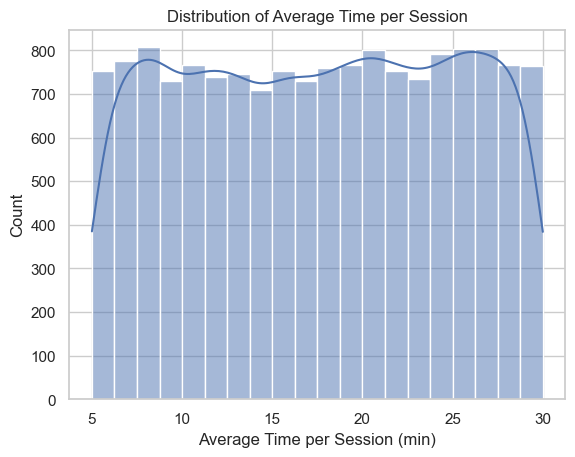

In [90]:
sns.histplot(user_interaction_data_df['Average Time per Session (min)'], bins=20, kde=True)
plt.title('Distribution of Average Time per Session')
plt.show()

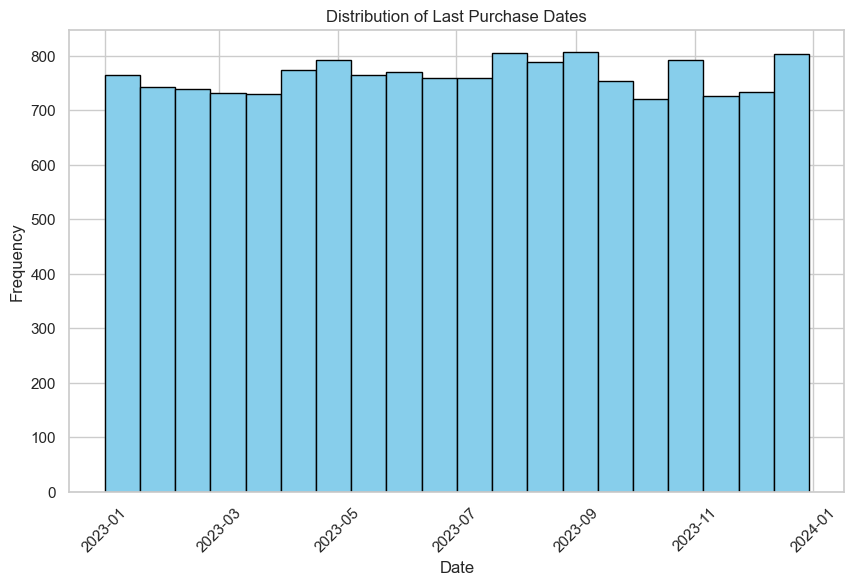

In [94]:
test = user_interaction_data_df.copy()
test['Last Purchase'] = pd.to_datetime(test['Last Purchase'])

plt.figure(figsize=(10, 6))
plt.hist(test['Last Purchase'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Last Purchase Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()